<center>

# **22AIE401 - Reinforcement Learning**  
# **Lab 2**  

</center>

### Team Members:
- Guruprasath M R - AIE22015  
- Rudraksh Mohanty - AIE22046  
- Shree Prasad M - AIE22050  
- Tharun Kaarthik G K - AIE22062  

---

### Objective:
To implement and analyze the ε-Greedy strategy for solving the multi-armed bandit problem, using a realistic simulation: selecting ads on a website to maximize click-through rate (CTR).

---

### Problem Statement:
A website displays one of 10 possible ads to each user. Each ad has a fixed (but unknown) probability of being clicked. Your agent must learn, over time, which ads to show more often to maximize total clicks. This is a non-associative bandit setting (no context).

---

### Common Interpretation after completing tasks:
To be filled

## Original Code

True Click-Through Rates (CTR) per Ad: [0.22 0.48 0.38 0.32 0.12 0.12 0.08 0.44 0.32 0.37]


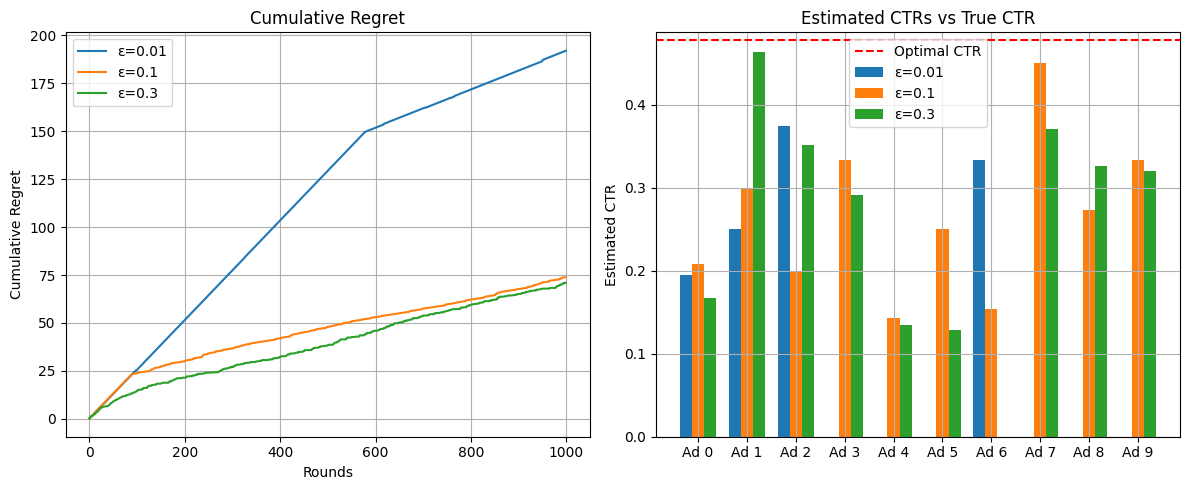

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
 
class EpsilonGreedyAgent: 
    def __init__(self, n_arms, epsilon): 
        self.n_arms = n_arms 
        self.epsilon = epsilon 
        self.counts = np.zeros(n_arms)      # Number of times each arm has been selected
        self.values = np.zeros(n_arms)      # Estimated value of each arm
        self.total_reward = 0 
        self.actions = [] 
        self.rewards = [] 
 
    def select_action(self): 
        if np.random.rand() < self.epsilon: 
            return np.random.randint(self.n_arms)  # Explore 
        else: 
            return np.argmax(self.values)          # Exploit 
 
    def update(self, action, reward): 
        self.counts[action] += 1 
        self.values[action] += (reward - self.values[action]) / self.counts[action] 
        self.total_reward += reward 
        self.actions.append(action) 
        self.rewards.append(reward) 
 
def simulate_bandit(true_ctrs, epsilon, n_rounds=1000): 
    n_arms = len(true_ctrs) 
    agent = EpsilonGreedyAgent(n_arms, epsilon) 
    optimal_arm = np.argmax(true_ctrs) 
    regrets = [] 
 
    for t in range(n_rounds): 
        action = agent.select_action() 
        reward = np.random.rand() < true_ctrs[action] 
        agent.update(action, reward) 
        regret = true_ctrs[optimal_arm] - true_ctrs[action] 
        regrets.append(regret) 
 
    return agent, np.cumsum(regrets) 
 
# ---------- Main Experiment ---------- 
np.random.seed(42) 
 
n_arms = 10 
true_ctrs = np.random.uniform(0.05, 0.5, n_arms) 
print("True Click-Through Rates (CTR) per Ad:", np.round(true_ctrs, 2)) 
 
n_rounds = 1000 
epsilons = [0.01, 0.1, 0.3] 
 
agents = {} 
regret_curves = {} 
 
for epsilon in epsilons: 
    agent, regrets = simulate_bandit(true_ctrs, epsilon, n_rounds) 
    agents[epsilon] = agent 
    regret_curves[epsilon] = regrets 
 
# ---------- Plotting Results ---------- 
plt.figure(figsize=(12, 5)) 
 
# Plot cumulative regret 
plt.subplot(1, 2, 1) 
for epsilon in epsilons: 
    plt.plot(regret_curves[epsilon], label=f'ε={epsilon}') 
plt.title("Cumulative Regret") 
plt.xlabel("Rounds") 
plt.ylabel("Cumulative Regret") 
plt.legend() 
plt.grid(True) 
 
# Plot estimated CTRs vs true CTRs 
plt.subplot(1, 2, 2) 
bar_width = 0.25 
x = np.arange(n_arms) 
for i, epsilon in enumerate(epsilons): 
    plt.bar(x + i * bar_width, 
            agents[epsilon].values, 
            width=bar_width, 
            label=f'ε={epsilon}') 
plt.axhline(np.max(true_ctrs), color='r', linestyle='--', label='Optimal CTR') 
plt.xticks(x + bar_width, [f'Ad {i}' for i in range(n_arms)]) 
plt.ylabel("Estimated CTR") 
plt.title("Estimated CTRs vs True CTR") 
plt.legend() 
plt.grid(True) 
plt.tight_layout() 
plt.show()

## Task 1: Contextual Bandit with User Segments
**Changes wrt original:**
- Simulate multiple user segments (teenagers, adults, seniors), each with different CTRs per ad.
- Modify bandit logic to use user context (segment) and switch to contextual ε-Greedy.

Segment CTRs:
teenager:  [0.36 0.18 0.15 0.3  0.37 0.24 0.49 0.36 0.27 0.23]
adult:  [0.2  0.38 0.25 0.08 0.23 0.38 0.13 0.13 0.29 0.29]
senior:  [0.34 0.43 0.38 0.32 0.38 0.2  0.21 0.15 0.18 0.33]


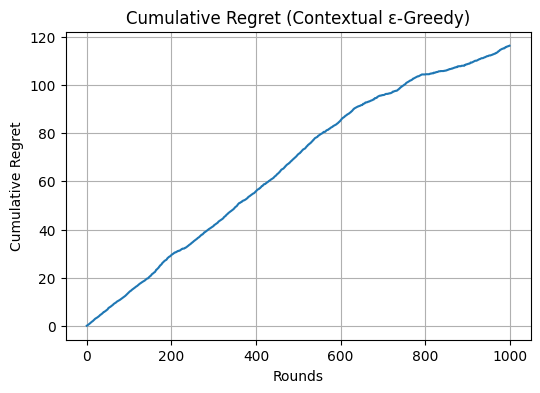

In [2]:
# Simulate user segments
segments = ['teenager', 'adult', 'senior']
n_arms = 10
np.random.seed(123)
segment_ctrs = {seg: np.random.uniform(0.05, 0.5, n_arms) for seg in segments}
print("Segment CTRs:")
for seg in segments:
    print(f"{seg}: ", np.round(segment_ctrs[seg], 2))

class ContextualEpsilonGreedyAgent:
    def __init__(self, n_arms, epsilon, segments):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.segments = segments
        self.counts = {seg: np.zeros(n_arms) for seg in segments}
        self.values = {seg: np.zeros(n_arms) for seg in segments}
        self.total_reward = 0
    def select_action(self, segment):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values[segment])
    def update(self, segment, action, reward):
        self.counts[segment][action] += 1
        self.values[segment][action] += (reward - self.values[segment][action]) / self.counts[segment][action]
        self.total_reward += reward

def simulate_contextual_bandit(segment_ctrs, epsilon, n_rounds=1000):
    agent = ContextualEpsilonGreedyAgent(n_arms, epsilon, segments)
    regrets = []
    for t in range(n_rounds):
        segment = np.random.choice(segments)
        action = agent.select_action(segment)
        reward = np.random.rand() < segment_ctrs[segment][action]
        agent.update(segment, action, reward)
        optimal_arm = np.argmax(segment_ctrs[segment])
        regret = segment_ctrs[segment][optimal_arm] - segment_ctrs[segment][action]
        regrets.append(regret)
    return agent, np.cumsum(regrets)

# Run simulation
epsilon = 0.1
agent_ctx, regrets_ctx = simulate_contextual_bandit(segment_ctrs, epsilon)
plt.figure(figsize=(6,4))
plt.plot(regrets_ctx)
plt.title('Cumulative Regret (Contextual ε-Greedy)')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.grid(True)
plt.show()

## Task 2: Per-Ad Budget Constraints
**Changes wrt original:**
- Implement per-ad budget (e.g., only 100 displays for premium ads).
- Penalize exceeding limits in reward logic.

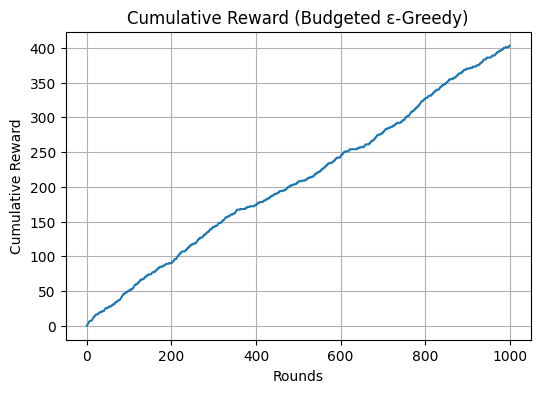

In [3]:
# Define budgets for ads
budgets = np.full(n_arms, 100)
premium_ads = [0, 1, 2]  # Example: first 3 ads are premium
budgets[premium_ads] = 100
budgets[3:] = 300  # Non-premium ads have higher budget

class BudgetedEpsilonGreedyAgent(EpsilonGreedyAgent):
    def __init__(self, n_arms, epsilon, budgets):
        super().__init__(n_arms, epsilon)
        self.budgets = budgets.copy()
    def select_action(self):
        available = np.where(self.budgets > 0)[0]
        if len(available) == 0:
            return None  # No ads left
        if np.random.rand() < self.epsilon:
            return np.random.choice(available)
        else:
            best = np.argmax(self.values[available])
            return available[best]
    def update(self, action, reward):
        if self.budgets[action] <= 0:
            reward = -1  # Penalize exceeding budget
        else:
            self.budgets[action] -= 1
        super().update(action, reward)

def simulate_budgeted_bandit(true_ctrs, epsilon, budgets, n_rounds=1000):
    agent = BudgetedEpsilonGreedyAgent(len(true_ctrs), epsilon, budgets)
    rewards = []
    for t in range(n_rounds):
        action = agent.select_action()
        if action is None:
            rewards.append(-1)
            continue
        reward = np.random.rand() < true_ctrs[action] if agent.budgets[action] > 0 else -1
        agent.update(action, reward)
        rewards.append(reward)
    return agent, np.cumsum(rewards)

# Run simulation
agent_budget, cum_rewards_budget = simulate_budgeted_bandit(true_ctrs, 0.1, budgets, n_rounds)
plt.figure(figsize=(6,4))
plt.plot(cum_rewards_budget)
plt.title('Cumulative Reward (Budgeted ε-Greedy)')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.grid(True)
plt.show()

## Task 3: Compare ε-Greedy, UCB, and Softmax Selection under CTR Drift
**Changes wrt original:**
- Implement UCB and Softmax strategies in addition to ε-Greedy.
- Simulate CTR drift (change CTRs during simulation).
- Record cumulative reward and plot average regret for all strategies.

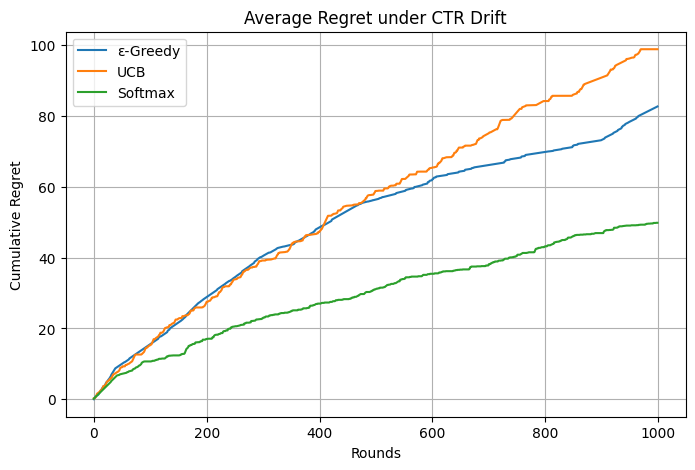

ε-Greedy: Final Cumulative Reward = 362
UCB: Final Cumulative Reward = 353
Softmax: Final Cumulative Reward = 435


In [4]:
# UCB Agent
class UCBAgent:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_reward = 0
    def select_action(self, t):
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        ucb = self.values + np.sqrt(2 * np.log(t+1) / self.counts)
        return np.argmax(ucb)
    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]
        self.total_reward += reward

# Softmax Agent
class SoftmaxAgent:
    def __init__(self, n_arms, tau=0.1):
        self.n_arms = n_arms
        self.tau = tau
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_reward = 0
    def select_action(self):
        exp_vals = np.exp(self.values / self.tau)
        probs = exp_vals / np.sum(exp_vals)
        return np.random.choice(self.n_arms, p=probs)
    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]
        self.total_reward += reward

# Simulate CTR drift
def simulate_drift_bandit(agent_class, true_ctrs, n_rounds=1000, **kwargs):
    agent = agent_class(len(true_ctrs), **kwargs) if kwargs else agent_class(len(true_ctrs))
    optimal_arm = np.argmax(true_ctrs)
    regrets = []
    rewards = []
    for t in range(n_rounds):
        # Simulate drift: every 300 rounds, change CTRs slightly
        if t > 0 and t % 300 == 0:
            true_ctrs += np.random.uniform(-0.05, 0.05, len(true_ctrs))
            true_ctrs = np.clip(true_ctrs, 0.05, 0.5)
            optimal_arm = np.argmax(true_ctrs)
        if agent_class == UCBAgent:
            action = agent.select_action(t)
        elif agent_class == SoftmaxAgent:
            action = agent.select_action()
        else:
            action = agent.select_action()
        reward = np.random.rand() < true_ctrs[action]
        agent.update(action, reward)
        regret = true_ctrs[optimal_arm] - true_ctrs[action]
        regrets.append(regret)
        rewards.append(reward)
    return agent, np.cumsum(regrets), np.cumsum(rewards)

# Run all strategies
np.random.seed(42)
true_ctrs = np.random.uniform(0.05, 0.5, n_arms)
n_rounds = 1000
agents = {}
regrets = {}
rewards = {}
agents['ε-Greedy'], regrets['ε-Greedy'], rewards['ε-Greedy'] = simulate_drift_bandit(EpsilonGreedyAgent, true_ctrs.copy(), n_rounds, epsilon=0.1)
agents['UCB'], regrets['UCB'], rewards['UCB'] = simulate_drift_bandit(UCBAgent, true_ctrs.copy(), n_rounds)
agents['Softmax'], regrets['Softmax'], rewards['Softmax'] = simulate_drift_bandit(SoftmaxAgent, true_ctrs.copy(), n_rounds, tau=0.1)

# Plot average regret
plt.figure(figsize=(8,5))
for name in regrets:
    plt.plot(regrets[name], label=name)
plt.title('Average Regret under CTR Drift')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
plt.show()

# Print final cumulative rewards
for name in rewards:
    print(f"{name}: Final Cumulative Reward = {rewards[name][-1]}")